In [7]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

basedir = "../res"

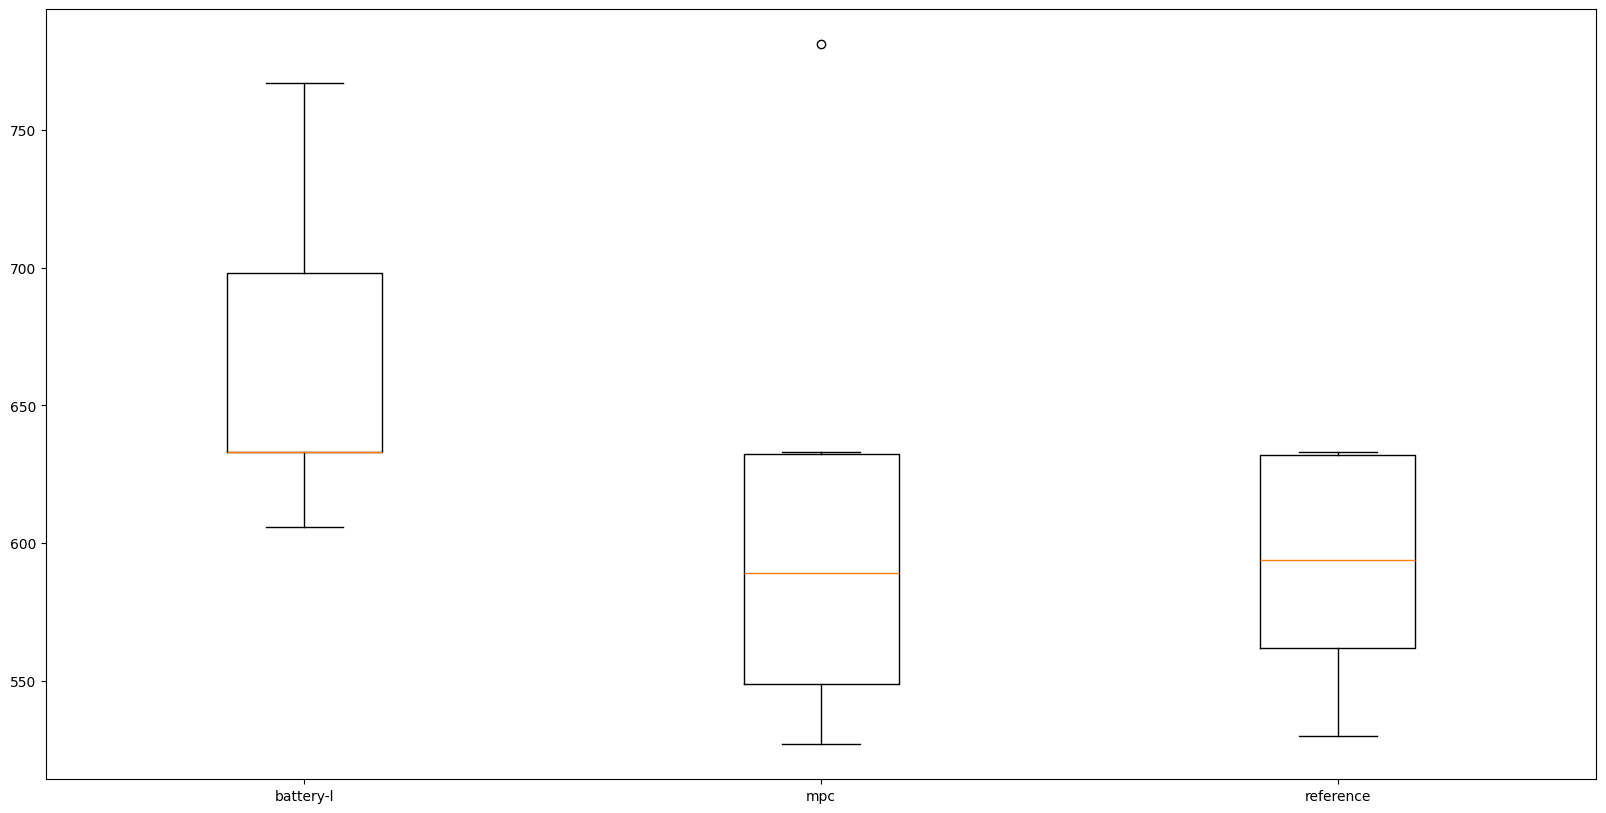

In [8]:
def plot_robot_average_operation_time(basedir):
    fig, ax1 = plt.subplots()
    labels = []
    data = []
    
    for dir in os.listdir(basedir):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'simulation_stats.csv'))
        
        data.append(df.filter(like='operation_time').sum())
        labels.append(dir)
        
    ax1.boxplot(data)
    ax1.set_xticklabels(labels)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    fig.show()
        
plot_robot_average_operation_time(basedir)
    

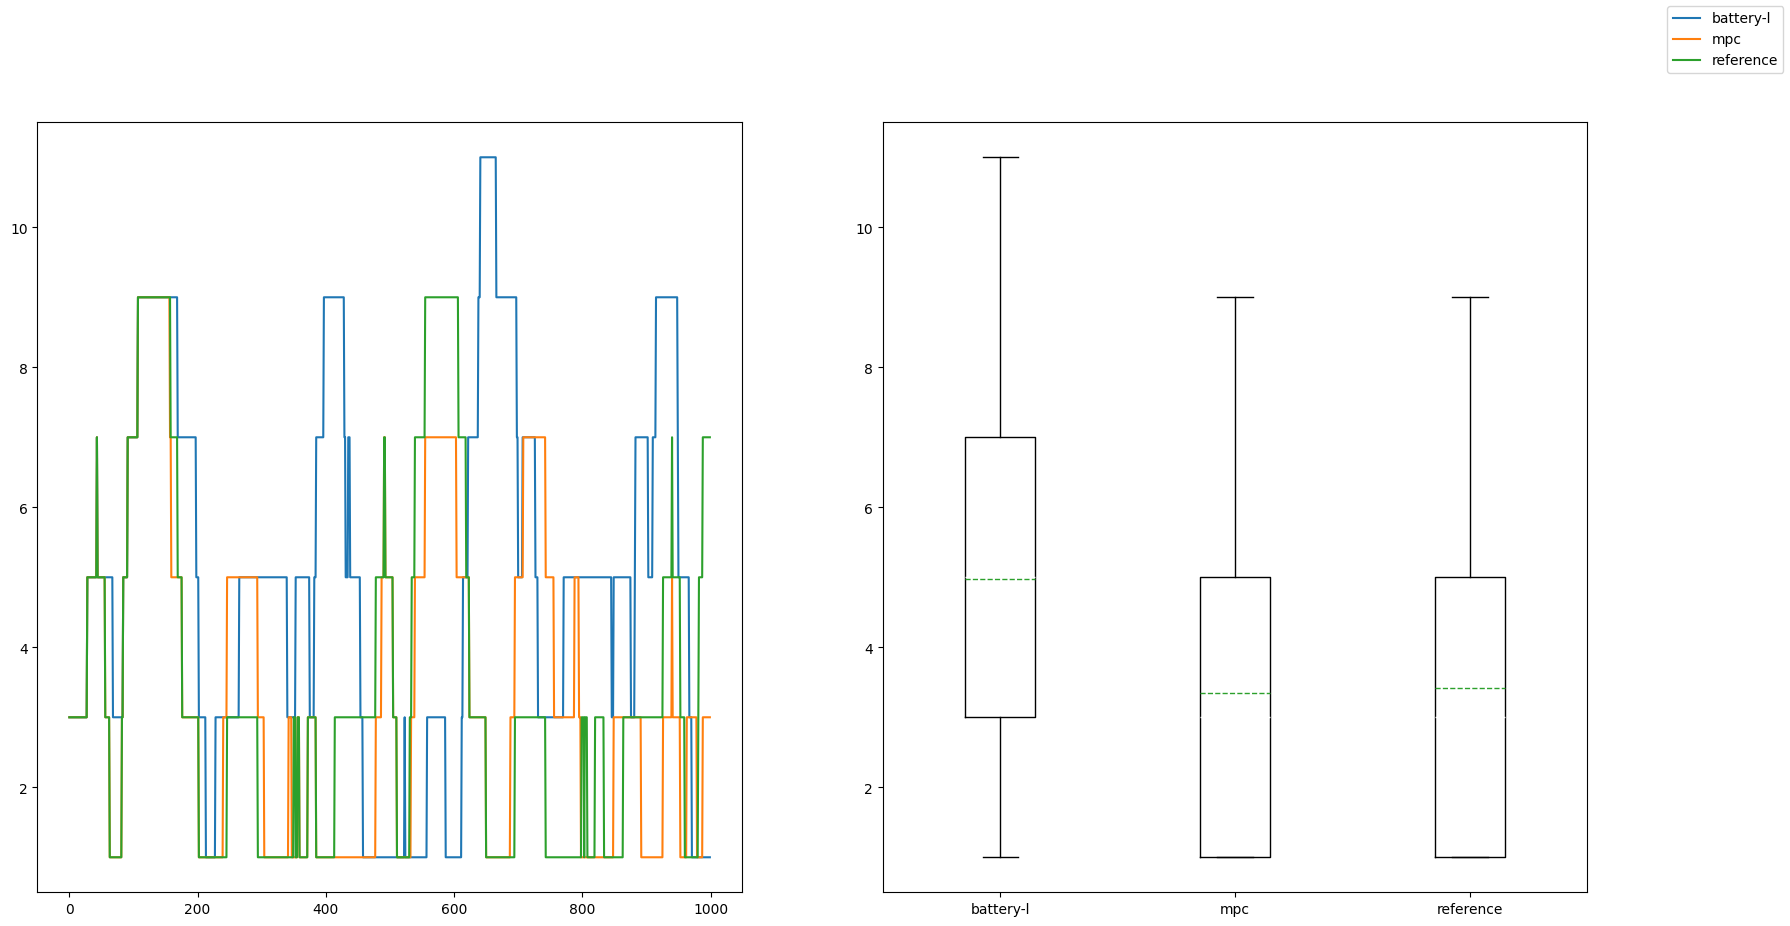

In [9]:
def plot_robot_status_diff(basedir):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    data = []
    labels = []
    
    for dir in os.listdir(basedir):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'robot_status.csv'))
        df["diff"] = abs(df["charging"] - df["operating"])
        
        ax1.plot(df["epoch"], df["diff"], label=dir)
        data.append(df["diff"])
        labels.append(dir)
        
    ax2.boxplot(data, showmeans=True, meanline=True,
            medianprops=dict(color='white'))
    ax2.set_xticklabels(labels)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    fig.legend()
    fig.show()
        
plot_robot_status_diff(basedir)
  

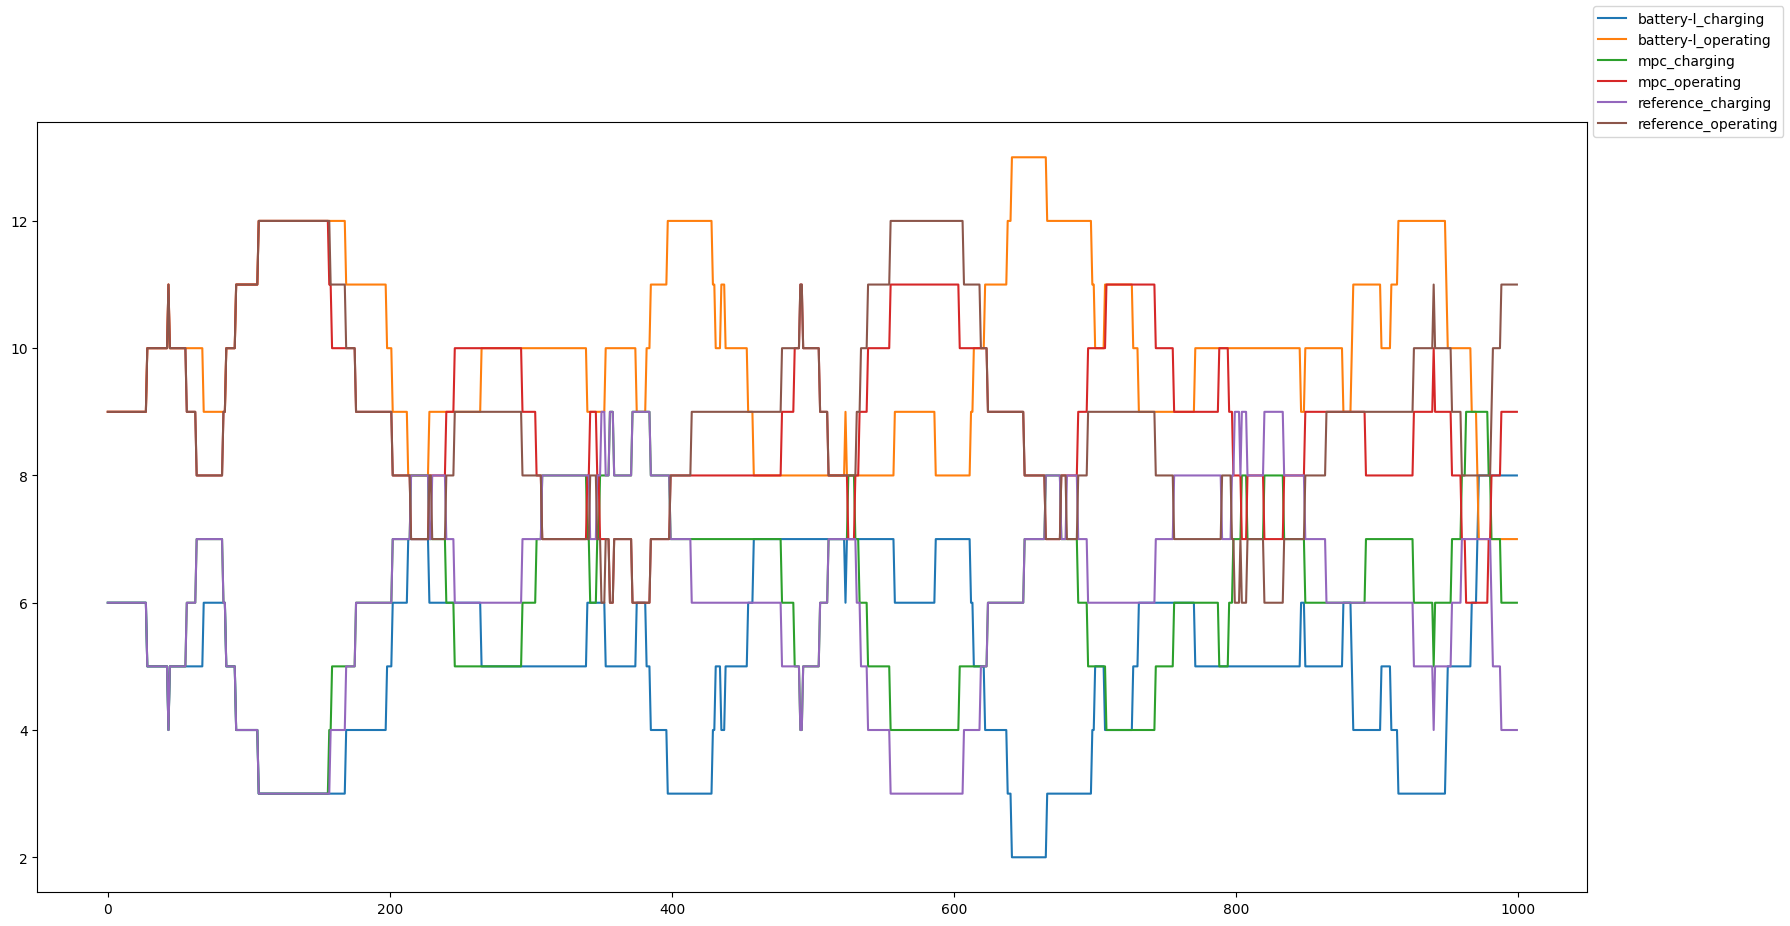

In [10]:
def plot_robot_status(basedir):
    fig, ax = plt.subplots()
    
    for dir in os.listdir(basedir):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'robot_status.csv'))
        ax.plot(df["epoch"], df["charging"], label=dir+"_charging")
        ax.plot(df["epoch"], df["operating"], label=dir+"_operating")        
    
    fig.set_figheight(10)
    fig.set_figwidth(20)
    fig.legend()
    fig.show()
    
plot_robot_status(basedir)


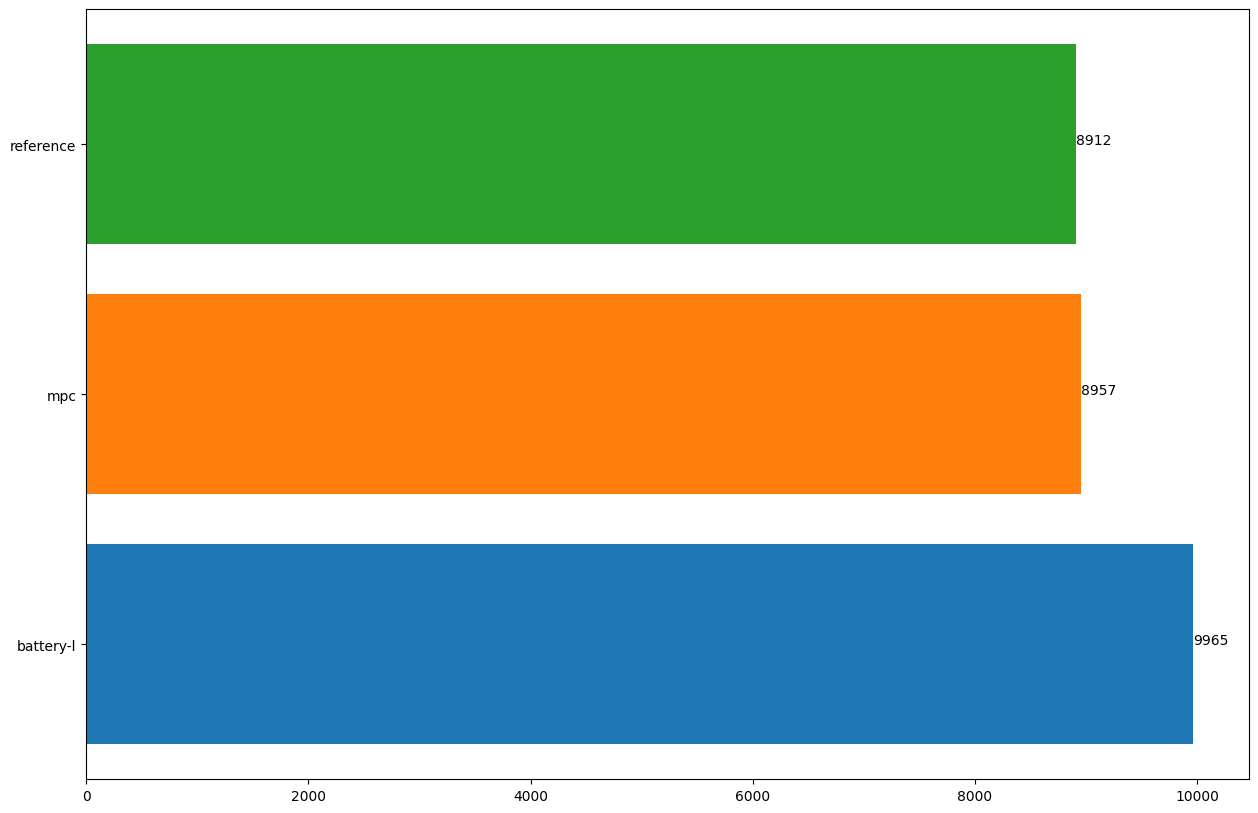

In [11]:
def plot_robot_operation_time(basedir):
    fig, ax = plt.subplots()
    
    for dir in sorted(os.listdir(basedir)):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'simulation_stats.csv'))
        
        cum = df.filter(like='operation_time').sum().sum()
        
        ax.barh(dir, cum)
        ax.text(cum, dir, str(int(cum)))

    fig.set_figheight(10)
    fig.set_figwidth(15)
    #fig.legend()
    fig.show()
    
plot_robot_operation_time(basedir)


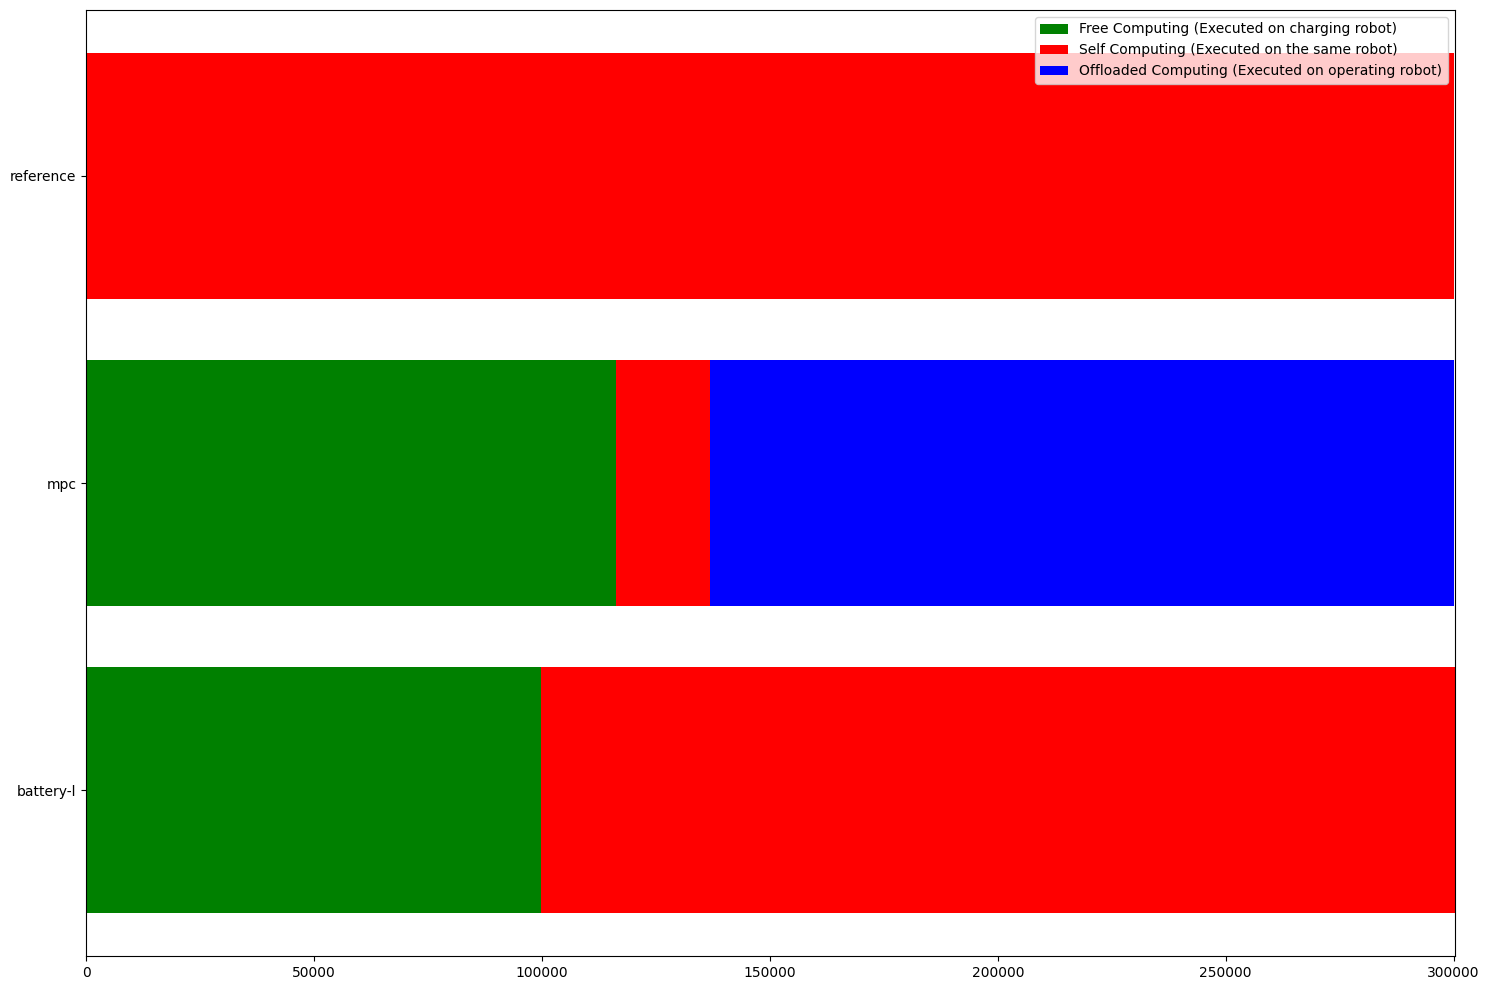

In [12]:
def plot_robot_computing(basedir):
    fig, ax = plt.subplots()
    self_c = []
    free_c = []
    off_c = []
    x = []
    
    for dir in sorted(os.listdir(basedir)):
        dir_path = os.path.join(basedir, dir)
        if not os.path.isdir(dir_path):
            continue
        
        x.append(dir)
        df = pd.read_csv(os.path.join(dir_path, 'simulation_stats.csv'))
        
        # Calculate cumulative free and cost computing
        cum_free = df.filter(like='free_computing').sum().sum()
        cum_self = df.filter(like='self_computing').sum().sum()
        cum_off = df.filter(like='offload_computing').sum().sum()
        
        self_c.append(cum_self)
        free_c.append(cum_free)
        off_c.append(cum_off)
        
    free_c = np.array(free_c)
    self_c = np.array(self_c)
    off_c = np.array(off_c)
        
    # Plotting
    ax.barh(x, free_c, color='g', label='Free Computing (Executed on charging robot)')
    ax.barh(x, self_c, left=free_c, color='r', label='Self Computing (Executed on the same robot)')
    ax.barh(x, off_c, left=free_c+self_c, color='b', label="Offloaded Computing (Executed on operating robot)")

    # Set figure size
    fig.set_figheight(10)
    fig.set_figwidth(15)

    # Add legend
    ax.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()
    
plot_robot_computing(basedir)
